In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load the cafe sales dataset from a CSV file into a pandas DataFrame

In [9]:
data = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\PYTHON PROJECTS\dirty_cafe_sales.csv")

Display the first five rows of the dataset

In [10]:
data.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


Generate summary statistics for numerical columns

In [11]:
data.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_9226047,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


Display information about the DataFrame, including column types and non-null counts

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


 Check the total number of missing values in each column

In [13]:
data.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

 Count the frequency of each unique item

In [14]:
data["Item"].value_counts()

Item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
UNKNOWN      344
ERROR        292
Name: count, dtype: int64

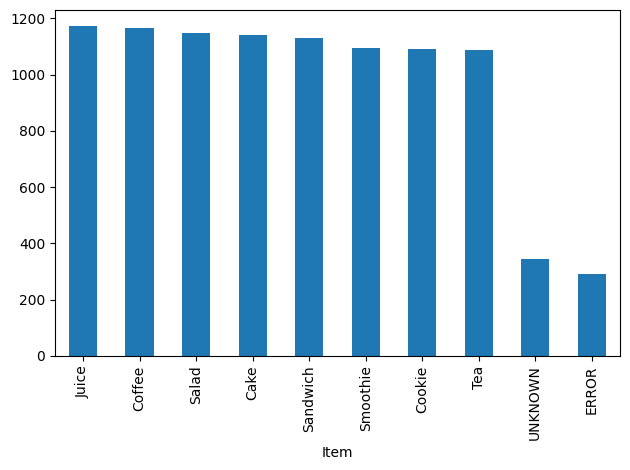

In [15]:
# Plot a bar chart showing the frequency of each item
data["Item"].value_counts().plot(kind ="bar")
# Rotate item labels for readability
plt.xticks(rotation=90)
# Adjust layout to prevent label cutoff
plt.tight_layout()

 Select all items that are not "UNKNOWN" or "ERROR"

In [16]:
val_item = data.loc[~data["Item"].isin(["UNKNOWN" , "ERROR"]),"Item"]

Display the filtered items (excluding "UNKNOWN" and "ERROR")

In [17]:
val_item

0         Coffee
1           Cake
2         Cookie
3          Salad
4         Coffee
          ...   
9995      Coffee
9996         NaN
9997      Coffee
9998      Cookie
9999    Sandwich
Name: Item, Length: 9364, dtype: object

Calculate the relative frequency (probability) of each item

In [18]:
prob_item = val_item.value_counts(normalize=True)

Display the probability (relative frequency) of each item

In [19]:
prob_item

Item
Juice       0.129664
Coffee      0.129000
Salad       0.127118
Cake        0.126121
Sandwich    0.125235
Smoothie    0.121360
Cookie      0.120917
Tea         0.120585
Name: proportion, dtype: float64

Find the indices of rows where the 'Item' column is "UNKNOWN" or "ERROR"

In [20]:
nan_item = data.loc[data["Item"].isin(["UNKNOWN" , "ERROR"])].index

Display the indices of rows with invalid items ("UNKNOWN" or "ERROR")

In [21]:
nan_item

Index([   6,   14,   31,   33,   36,   52,   63,   69,   88,   91,
       ...
       9780, 9836, 9865, 9910, 9918, 9946, 9951, 9958, 9981, 9994],
      dtype='int64', length=636)

 Replace invalid items ("UNKNOWN" or "ERROR") with randomly sampled valid items
 Sampling is done based on the probability distribution of existing items

In [22]:
data.loc[nan_item,"Item"] = np.random.choice(
    prob_item.index, 
    size = len(nan_item), 
    p= prob_item.values
)

Display the frequency of each item in the cleaned dataset

In [23]:
data["Item"].value_counts

<bound method IndexOpsMixin.value_counts of 0         Coffee
1           Cake
2         Cookie
3          Salad
4         Coffee
          ...   
9995      Coffee
9996         NaN
9997      Coffee
9998      Cookie
9999    Sandwich
Name: Item, Length: 10000, dtype: object>

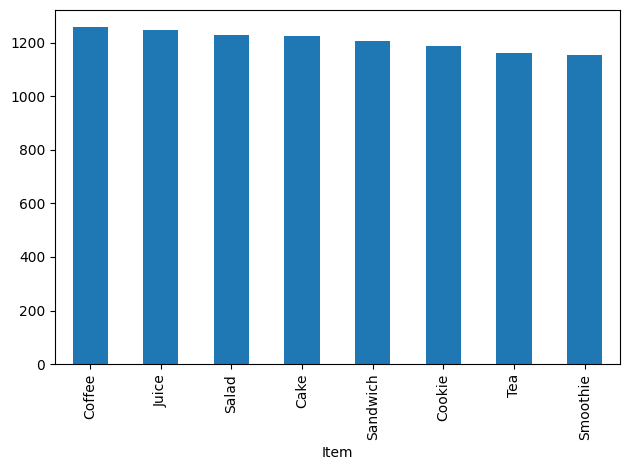

In [24]:
# Plot a bar chart showing the frequency of each item after cleaning
data["Item"].value_counts().plot(kind ="bar")
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# Adjust layout to prevent overlapping or cutoff labels
plt.tight_layout()

Check the total number of missing values in each column after cleaning

In [25]:
data.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

Get the indices of rows where the 'Item' column is missing (NaN)

In [26]:
na_idx = data.index[data["Item"].isna()]

Replace missing items (NaN) with randomly sampled valid items
Sampling is based on the probability distribution of existing items

In [27]:
data.loc[na_idx, "Item"] = np.random.choice(
    prob_item.index,
    size = len(na_idx),
    p=prob_item.values
)

Verify that there are no more missing values in the dataset

In [28]:
data.isnull().sum()

Transaction ID         0
Item                   0
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

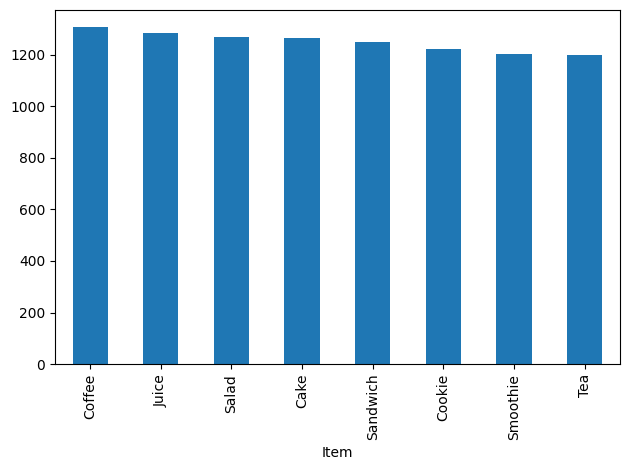

In [29]:
# Plot a bar chart showing the frequency of each item after imputing missing values
data["Item"].value_counts().plot(kind ="bar")
# Rotate x-axis labels for readability
plt.xticks(rotation=90)
# Adjust layout to prevent overlapping or cutoff labels
plt.tight_layout()

Check the number of missing values in each column

In [30]:
data.isnull().sum()

Transaction ID         0
Item                   0
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

Display the frequency of each quantity value in the dataset

In [31]:
data["Quantity"].value_counts()

Quantity
5          2013
2          1974
4          1863
3          1849
1          1822
UNKNOWN     171
ERROR       170
Name: count, dtype: int64

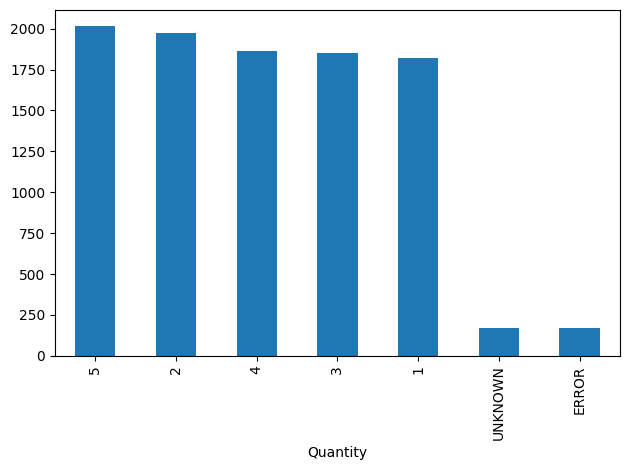

In [32]:
# Plot a bar chart showing the frequency of each quantity value
data["Quantity"].value_counts().plot(kind ="bar")
# Rotate x-axis labels for readability
plt.xticks(rotation=90)
# Adjust layout to prevent overlapping or cutoff labels
plt.tight_layout()

Select all Quantity values that are not "UNKNOWN" or "ERROR"

In [33]:
val_quan = data.loc[~data["Quantity"].isin(["UNKNOWN" , "ERROR"]),"Quantity"]

Calculate the relative frequency (probability) of each valid Quantity

In [34]:
prob_quan = val_quan.value_counts(normalize=True)

Display the probability (relative frequency) of each valid Quantity

In [35]:
prob_quan

Quantity
5    0.211427
2    0.207331
4    0.195673
3    0.194202
1    0.191366
Name: proportion, dtype: float64

Get the indices of rows where the 'Quantity' column is "UNKNOWN" or "ERROR"

In [36]:
nan_quan = data.loc[data["Quantity"].isin(["UNKNOWN" , "ERROR"])].index

Display the indices of rows with invalid Quantity values ("UNKNOWN" or "ERROR")

In [37]:
nan_quan

Index([  20,   55,   57,  117,  153,  177,  178,  189,  198,  214,
       ...
       9819, 9832, 9846, 9852, 9911, 9932, 9935, 9944, 9957, 9984],
      dtype='int64', length=341)

Replace invalid Quantity entries ("UNKNOWN" or "ERROR") with randomly sampled valid quantities
Sampling is based on the probability distribution of existing Quantity values

In [38]:
data.loc[nan_quan, "Quantity"] = np.random.choice(
    prob_quan.index,
    size = len(nan_quan),
    p=prob_quan.values
)

Get the indices of rows where the 'Quantity' column has missing values (NaN)

In [39]:
na_quan = data.index[data["Quantity"].isna()]

Replace missing Quantity values (NaN) with randomly sampled valid quantities
Sampling is based on the probability distribution of existing Quantity values

In [40]:
data.loc[na_quan, "Quantity"] = np.random.choice(
    prob_quan.index,
    size = len(na_quan),
    p=prob_quan.values
)

Check the number of missing values in each column to ensure dataset is clean

In [41]:
data.isnull().sum()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

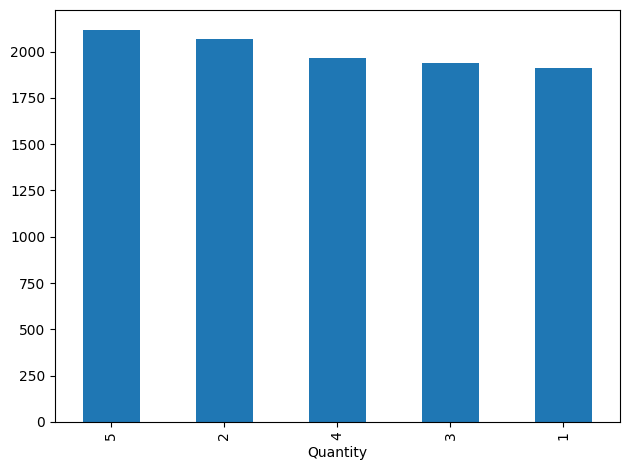

In [42]:
# Plot a bar chart showing the frequency of each Quantity value after cleanin
data["Quantity"].value_counts().plot(kind ="bar")
# Rotate x-axis labels for readability
plt.xticks(rotation=90)
# Adjust layout to prevent overlapping or cutoff labels
plt.tight_layout()

Select all Price Per Unit values that are not "UNKNOWN" or "ERROR"

In [43]:
val_price = data.loc[~data["Price Per Unit"].isin(["UNKNOWN" , "ERROR"]),"Price Per Unit"]

# Calculate the relative frequency (probability) of each valid Price Per Unit

In [44]:
prob_price = val_price.value_counts(normalize=True)

Display the probability (relative frequency) of each valid Price Per Unit

In [45]:
prob_price

Price Per Unit
3.0    0.256575
4.0    0.246224
2.0    0.129608
5.0    0.127179
1.0    0.120735
1.5    0.119679
Name: proportion, dtype: float64

Get the indices of rows where the 'Price Per Unit' column is "UNKNOWN" or "ERROR"

In [46]:
nan_price = data.loc[data["Price Per Unit"].isin(["UNKNOWN" , "ERROR"])].index

Replace invalid Price Per Unit entries ("UNKNOWN" or "ERROR") with randomly sampled valid prices
Sampling is based on the probability distribution of existing Price Per Unit values

In [47]:
data.loc[nan_price,"Price Per Unit"] = np.random.choice(
    prob_price.index, 
    size = len(nan_price), 
    p= prob_price.values
)

Check for any remaining missing values in the dataset

In [48]:
data.isnull().sum()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

Get the indices of rows where the 'Price Per Unit' column has missing values (NaN)

In [49]:
na_price = data.index[data["Price Per Unit"].isna()]

Replace missing Price Per Unit values (NaN) with randomly sampled valid prices
Sampling is based on the probability distribution of existing Price Per Unit values

In [50]:
data.loc[na_price, "Price Per Unit"] = np.random.choice(
    prob_price.index,
    size = len(na_price),
    p=prob_price.values
)

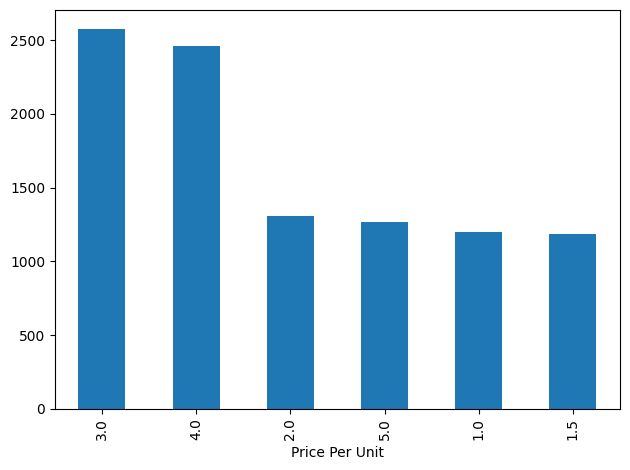

In [51]:
# Plot a bar chart showing the frequency of each Price Per Unit value after cleaning
data["Price Per Unit"].value_counts().plot(kind ="bar")
# Rotate x-axis labels for readability
plt.xticks(rotation=90)
# Adjust layout to prevent overlapping or cutoff labels
plt.tight_layout()

Check the number of missing values in each column to confirm cleaning

In [52]:
data.isnull().sum()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit         0
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

Print the names of all columns in the dataset

In [53]:
print(data.columns)

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')


Display the data types of each column in the dataset

In [54]:
data.dtypes

Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object

Drop the "Total Spent" column from the dataset

In [55]:
data=data.drop("Total Spent" , axis=1)

In [56]:
# Convert 'Quantity' and 'Price Per Unit' columns to numeric values, coercing errors to NaN
data["Quantity"] = pd.to_numeric(data["Quantity"], errors="coerce")
data["Price Per Unit"] = pd.to_numeric(data["Price Per Unit"], errors="coerce")
# Calculate 'Total Spent' as the product of 'Quantity' and 'Price Per Unit'
data["Total Spent"] = data["Quantity"] * data["Price Per Unit"]


Get the count of unique values in the "Payment Method" column to understand its distribution

In [57]:
data["Payment Method"].value_counts()

Payment Method
Digital Wallet    2291
Credit Card       2273
Cash              2258
ERROR              306
UNKNOWN            293
Name: count, dtype: int64

Select all valid "Payment Method" values that are not "UNKNOWN" or "ERROR"

In [58]:
val_pay = data.loc[~data["Payment Method"].isin(["UNKNOWN" , "ERROR"]),"Payment Method"]

Calculate the relative frequency (probability) of each valid Payment Method

In [59]:
prob_pay = val_pay.value_counts(normalize=True)

Display the probability distribution of valid Payment Method values

In [60]:
prob_pay

Payment Method
Digital Wallet    0.335825
Credit Card       0.333187
Cash              0.330988
Name: proportion, dtype: float64

Get the indices of rows where the 'Payment Method' column has "UNKNOWN" or "ERROR" values

In [61]:
nan_pay = data.loc[data["Payment Method"].isin(["UNKNOWN" , "ERROR"])].index

Replace invalid Payment Method entries ("UNKNOWN" or "ERROR") with randomly sampled valid payment methods
Sampling is based on the probability distribution of valid Payment Methods

In [62]:
data.loc[nan_pay,"Payment Method"] = np.random.choice(
    prob_pay.index, 
    size = len(nan_pay), 
    p= prob_pay.values
)

Check how many missing values (NaNs) remain in the "Payment Method" column after imputation

In [63]:
data["Payment Method"].isnull().sum()

np.int64(2579)

Get the indices of rows where the "Payment Method" column has missing (NaN) values

In [64]:
na_pay = data.index[data["Payment Method"].isna()]

Replace missing Payment Method values (NaN) with randomly sampled valid payment methods
Sampling is based on the probability distribution of valid Payment Methods

In [65]:
data.loc[na_pay, "Payment Method"] = np.random.choice(
    prob_pay.index,
    size = len(na_pay),
    p=prob_pay.values
)

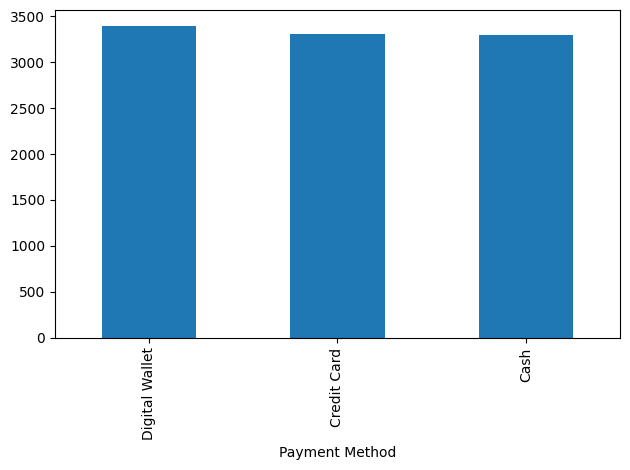

In [66]:
# Plot a bar chart showing the frequency of each Payment Method value after cleaning
data["Payment Method"].value_counts().plot(kind ="bar")
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# Adjust the layout to prevent labels from being cut off
plt.tight_layout()

Display the first 5 rows of the dataset to get a quick overview

In [67]:
data.head()

,Transaction ID,Item,Quantity,Price Per Unit,Payment Method,Location,Transaction Date,Total Spent
0,TXN_1961373,Coffee,2,2.0,Credit Card,Takeaway,2023-09-08,4.0
1,TXN_4977031,Cake,4,3.0,Cash,In-store,2023-05-16,12.0
2,TXN_4271903,Cookie,4,1.0,Credit Card,In-store,2023-07-19,4.0
3,TXN_7034554,Salad,2,5.0,Cash,UNKNOWN,2023-04-27,10.0
4,TXN_3160411,Coffee,2,2.0,Digital Wallet,In-store,2023-06-11,4.0


Get the count of unique values in the "Location" column to understand its distribution

In [68]:
data["Location"].value_counts()

Location
Takeaway    3022
In-store    3017
ERROR        358
UNKNOWN      338
Name: count, dtype: int64

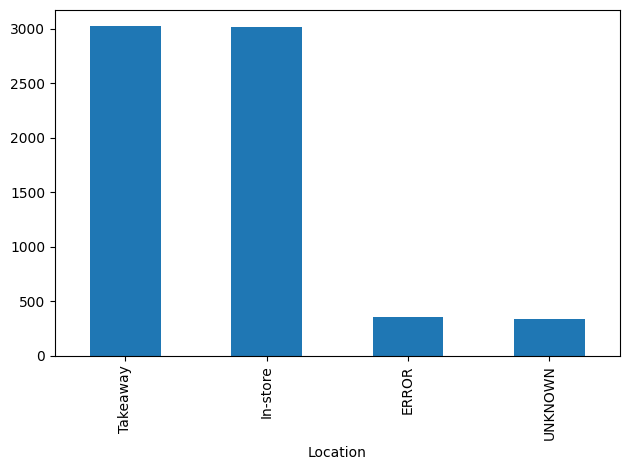

In [69]:
# Plot a bar chart showing the frequency of each Location value in the dataset
data["Location"].value_counts().plot(kind ="bar")
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# Adjust the layout to prevent label overlap or clipping
plt.tight_layout()

Filter out invalid location values ("UNKNOWN" or "ERROR") and keep only valid locations

In [70]:
val_location = data.loc[~data["Location"].isin(["UNKNOWN" , "ERROR"]),"Location"]

Calculate the relative frequency (probability) of each valid location

In [71]:
prob_location = val_location.value_counts(normalize=True)

Display the probability distribution of valid location values

In [72]:
prob_location

Location
Takeaway    0.500414
In-store    0.499586
Name: proportion, dtype: float64

Get the indices of rows where the "Location" column has "UNKNOWN" or "ERROR" values

In [73]:
nan_location = data.loc[data["Location"].isin(["UNKNOWN" , "ERROR"])].index

Replace invalid Location values ("UNKNOWN" or "ERROR") with randomly sampled valid locations
Sampling is based on the probability distribution of valid locations

In [74]:
data.loc[nan_location,"Location"] = np.random.choice(
    prob_location.index, 
    size = len(nan_location), 
    p = prob_location.values
)

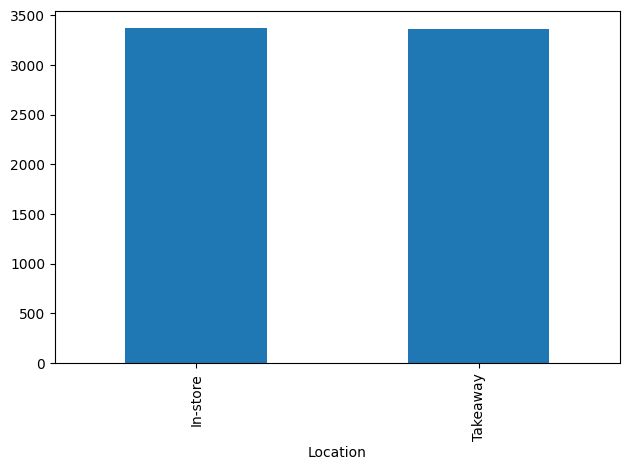

In [75]:
# Plot a bar chart showing the frequency of each Location value after imputing missing values
data["Location"].value_counts().plot(kind ="bar")
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# Adjust the layout to prevent labels from being cut off or overlapping
plt.tight_layout()

Check how many missing values (NaNs) remain in the "Location" column after imputing invalid entries

In [76]:
data["Location"].isnull().sum()

np.int64(3265)

Get the indices of rows where the "Location" column has missing (NaN) values

In [77]:
na_location = data.index[data["Location"].isna()]

Replace missing Location values (NaN) with randomly sampled valid locations
Sampling is based on the probability distribution of valid Location values

In [78]:
data.loc[na_location, "Location"] = np.random.choice(
    prob_location.index,
    size = len(na_location),
    p=prob_location.values
)

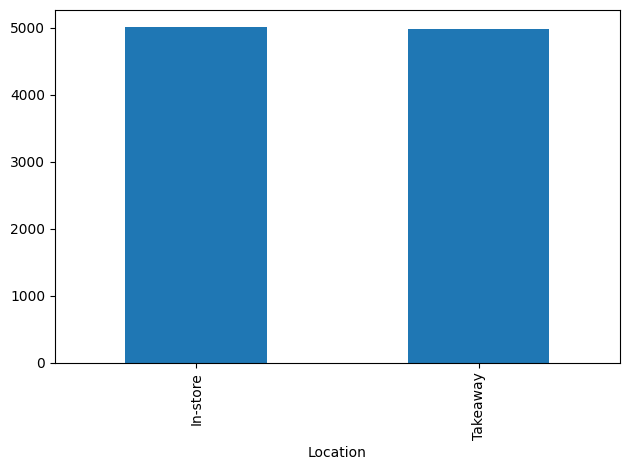

In [79]:
# Plot a bar chart showing the frequency of each Location value after imputing missing values
data["Location"].value_counts().plot(kind ="bar")
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# Adjust the layout to prevent labels from being cut off or overlapping
plt.tight_layout()

Display the first 5 rows of the dataset to get a quick overview of the data

In [80]:
data.head()

,Transaction ID,Item,Quantity,Price Per Unit,Payment Method,Location,Transaction Date,Total Spent
0,TXN_1961373,Coffee,2,2.0,Credit Card,Takeaway,2023-09-08,4.0
1,TXN_4977031,Cake,4,3.0,Cash,In-store,2023-05-16,12.0
2,TXN_4271903,Cookie,4,1.0,Credit Card,In-store,2023-07-19,4.0
3,TXN_7034554,Salad,2,5.0,Cash,In-store,2023-04-27,10.0
4,TXN_3160411,Coffee,2,2.0,Digital Wallet,In-store,2023-06-11,4.0


Filter out invalid "Transaction Date" values ("UNKNOWN" or "ERROR") and keep only valid transaction dates

In [81]:
val_date = data.loc[~data["Transaction Date"].isin(["UNKNOWN" , "ERROR"]),"Transaction Date"]

Calculate the relative frequency (probability) of each valid Transaction Date

In [82]:
prob_date = val_date.value_counts(normalize=True)

Display the probability distribution of valid Location values

In [83]:
prob_location

Location
Takeaway    0.500414
In-store    0.499586
Name: proportion, dtype: float64

Get the indices of rows where the "Transaction Date" column has "UNKNOWN" or "ERROR" values

In [84]:
nan_date = data.loc[data["Transaction Date"].isin(["UNKNOWN" , "ERROR"])].index

In [85]:
data.loc[nan_date,"Transaction Date"] = np.random.choice(
    prob_date.index, 
    size = len(nan_date), 
    p = prob_date.values
)

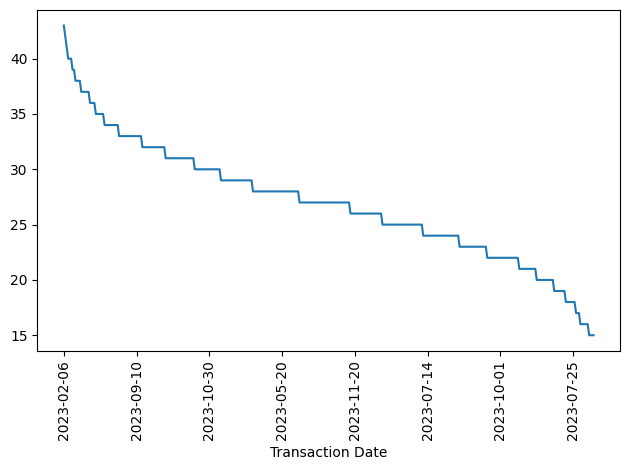

In [86]:
# Plot a line chart showing the frequency of each Transaction Date value
data["Transaction Date"].value_counts().plot(kind ="line")
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# Adjust the layout to prevent labels from being cut off or overlapping
plt.tight_layout()

Check how many missing values (NaNs) remain in the "Transaction Date" column after cleaning or imputation

In [87]:
data["Transaction Date"].isnull().sum()

np.int64(159)

Get the indices of rows where the "Transaction Date" column has missing (NaN) values

In [88]:
na_date = data.index[data["Transaction Date"].isna()]

Replace missing Transaction Date values (NaN) with randomly sampled valid dates
Sampling is based on the probability distribution of valid transaction dates

In [89]:
data.loc[na_date, "Transaction Date"] = np.random.choice(
    prob_date.index,
    size = len(na_date),
    p=prob_date.values
)

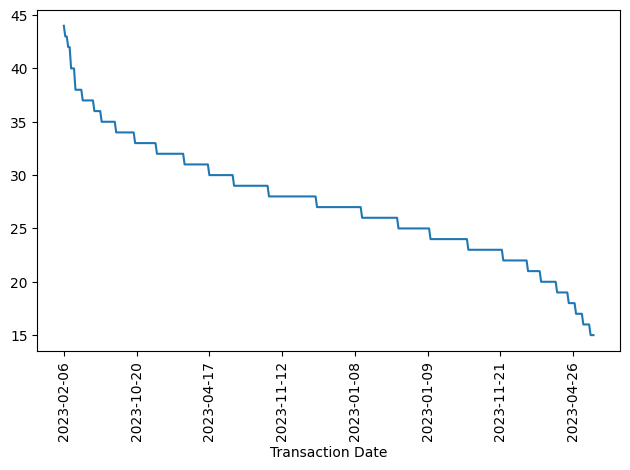

In [90]:
# Plot a line chart showing the frequency of each Transaction Date value
data["Transaction Date"].value_counts().plot(kind ="line")
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# Adjust the layout to prevent labels from being cut off or overlapping
plt.tight_layout()

Check how many missing values (NaNs) are in each column of the dataset

In [91]:
data.isnull().sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Payment Method      0
Location            0
Transaction Date    0
Total Spent         0
dtype: int64

Create a pairpot to visualize relationships between all numerical variables in the dataset

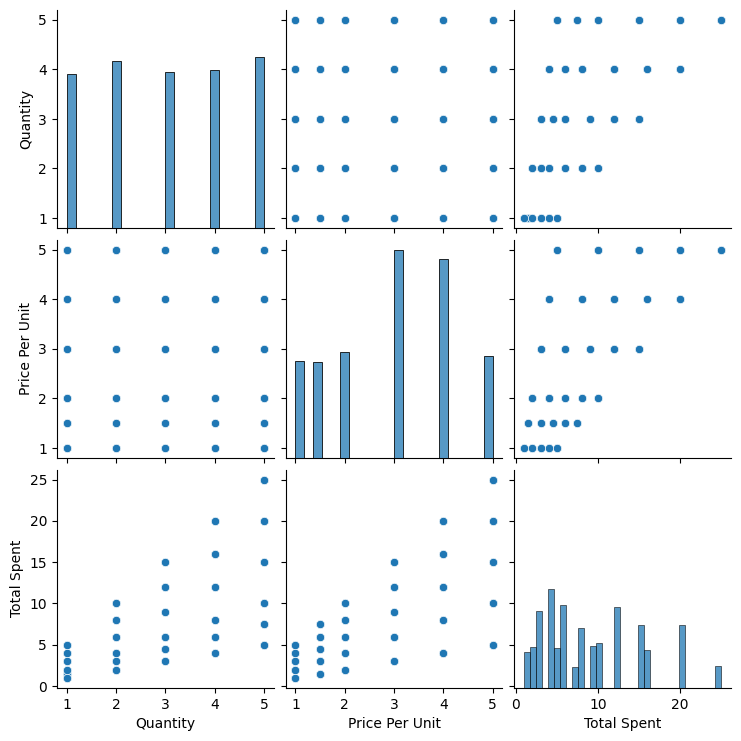

In [92]:
sns.pairplot(data=data)